# All regressions. . .

In [40]:
import numpy as np
import pandas as pd
import patsy as pt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy as pt
from pyearth import Earth #conda install sklearn-contrib-py-earth

from IPython.display import HTML
from ipywidgets import interact
import ipywidgets as widgets
import copy
import warnings
warnings.filterwarnings('ignore')

from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
import graphviz 
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn import datasets
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import linear_model as lm
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import LinearSVC, SVC
from mlxtend.plotting import plot_decision_regions
# Import classes from scikit-learn for logistic regression, LDA, QDA, and KNN classification
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest, chi2, f_classif

%matplotlib inline

The table below displays catalog-spending data for the first few of 200 randomly selected individuals from a very large (over 20,000 households) data base.1 The variable of particular interest is catalog spending as measured by the Spending Ratio (`SpendRat`). All of the catalog variables are represented by indicator variables; either the consumer bought and the variable is coded as 1 or the consumer didn’t buy and the variable is coded as 0. The other variables can be viewed as indexes for measuring assets, liquidity, and spending. I thank David Cameron for providing the random sample of 200 observations from a large catalog spending.

```
'catalog.csv': 200 obs. of 21 variables: 
SpendRat : num 11.8 16.8 11.4 31.3 1.9 ... 
Age : int 0 35 46 41 46 46 46 56 48 54 ... 
LenRes : int 2 3 9 2 7 15 16 31 8 8 ... 
Income : int 3 5 5 2 9 5 4 6 5 5 ... 
TotAsset : int 122 195 123 117 493 138 162 117 119 50 ... 
SecAssets : int 27 36 24 25 105 27 25 27 23 10 ... 
ShortLiq : int 225 220 200 222 310 340 230 300 250 200 ... 
LongLiq : int 422 420 420 419 500 450 430 440 430 420 ... 
WlthIdx : int 286 430 290 279 520 440 360 400 360 230 ... 
SpendVol : int 503 690 600 543 680 440 690 500 610 660 ... 
SpenVel : int 285 570 280 308 100 50 180 10 0 0 ... 
CollGifts : int 1 0 1 1 0 0 1 1 1 0 ... 
BricMortar : int 0 1 0 0 1 1 0 1 0 1 ... 
MarthaHome : int 0 1 0 0 1 1 0 1 1 0 ... 
SunAds : int 1 0 1 1 0 0 1 0 0 0 ... 
ThemeColl : int 0 0 1 1 0 0 0 1 1 0 ... 
CustDec : int 1 1 1 0 1 1 0 1 1 0 ... 
RetailKids : int 1 1 1 0 0 0 0 1 0 0 ... 
TeenWr : int 1 0 0 0 0 0 0 1 0 1 ... 
Carlovers : int 0 0 0 0 0 1 0 1 0 0 ... 
CountryColl: int 1 0 1 1 0 0 1 0 1 0 ...
````

In [2]:
catalog=pd.read_csv("catalog.csv")
catalog.isnull().any()

SpendRat       False
Age            False
LenRes         False
Income         False
TotAsset       False
SecAssets      False
ShortLiq       False
LongLiq        False
WlthIdx        False
SpendVol       False
SpenVel        False
CollGifts      False
BricMortar     False
MarthaHome     False
SunAds         False
ThemeColl      False
CustDec        False
RetailKids     False
TeenWr         False
Carlovers      False
CountryColl    False
dtype: bool

In [3]:
catalog.shape

(200, 21)

In [4]:
catalog.head().T

,0,1,2,3,4
SpendRat,11.83,16.83,11.38,31.33,1.9
Age,0.00,35.00,46.00,41.00,46.0
LenRes,2.00,3.00,9.00,2.00,7.0
Income,3.00,5.00,5.00,2.00,9.0
TotAsset,122.00,195.00,123.00,117.00,493.0
SecAssets,27.00,36.00,24.00,25.00,105.0
ShortLiq,225.00,220.00,200.00,222.00,310.0
LongLiq,422.00,420.00,420.00,419.00,500.0
WlthIdx,286.00,430.00,290.00,279.00,520.0
SpendVol,503.00,690.00,600.00,543.00,680.0


### Data Cleaning  
The goal of this section is to explore the data set and get it ready for analysis. There are no missing values in the data set, but there are some incorrect entries that must be identified and removed before completing the analysis. `Income` is coded as an ordinal value, ranging from 1 to 12. `Age` can be regarded as quantitative, and any value less than 18 is invalid. Length of residence (`LenRes`) is a value ranging from zero to someone’s age. `LenRes` should not be higher than `Age`. 

In [5]:
# any value less than 18 is invalid
age_lt18=(catalog['Age']<18)
age_lt18.value_counts()

False    186
True      14
Name: Age, dtype: int64

In [6]:
# LenRes should not be higher than Age.
lenres_gt_age=(catalog['LenRes']>catalog['Age'])
lenres_gt_age.value_counts()

False    184
True      16
dtype: int64

In [7]:
clean_catalog=catalog[~age_lt18 | ~lenres_gt_age]
clean_catalog.shape

(186, 21)

### Basic Summary 

Provide a basic summary of the cleaned data set. Include a table of univariate statistics to summarize each variable. Choose meaningful summary statistics for each type of variable. You should also include a basic summary of the catalog spending (`SpendRat`) including an appropriate graphical display.

In [8]:
clean_catalog.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186 entries, 1 to 199
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SpendRat     186 non-null    float64
 1   Age          186 non-null    int64  
 2   LenRes       186 non-null    int64  
 3   Income       186 non-null    int64  
 4   TotAsset     186 non-null    int64  
 5   SecAssets    186 non-null    int64  
 6   ShortLiq     186 non-null    int64  
 7   LongLiq      186 non-null    int64  
 8   WlthIdx      186 non-null    int64  
 9   SpendVol     186 non-null    int64  
 10  SpenVel      186 non-null    int64  
 11  CollGifts    186 non-null    int64  
 12  BricMortar   186 non-null    int64  
 13  MarthaHome   186 non-null    int64  
 14  SunAds       186 non-null    int64  
 15  ThemeColl    186 non-null    int64  
 16  CustDec      186 non-null    int64  
 17  RetailKids   186 non-null    int64  
 18  TeenWr       186 non-null    int64  
 19  Carlover

In [9]:
clean_catalog.describe().T

,count,mean,std,min,25%,50%,75%,max
SpendRat,186.0,44.616022,67.205269,0.08,6.195,18.805,50.4575,401.42
Age,186.0,54.397849,13.913353,20.00,44.000,53.000,62.7500,89.00
LenRes,186.0,14.720430,10.012819,0.00,8.000,11.000,19.0000,46.00
Income,186.0,4.456989,1.414511,1.00,4.000,5.000,5.0000,9.00
TotAsset,186.0,186.693548,156.661790,5.00,95.750,150.000,223.5000,999.00
SecAssets,186.0,41.258065,79.558566,0.00,19.000,28.500,42.0000,999.00
ShortLiq,186.0,240.693548,66.564885,160.00,210.000,230.000,260.0000,999.00
LongLiq,186.0,439.913978,55.640770,400.00,420.000,430.000,440.0000,999.00
WlthIdx,186.0,367.758065,90.003487,90.00,302.500,360.000,430.0000,880.00
SpendVol,186.0,568.844086,153.514829,0.00,528.000,610.000,670.0000,780.00


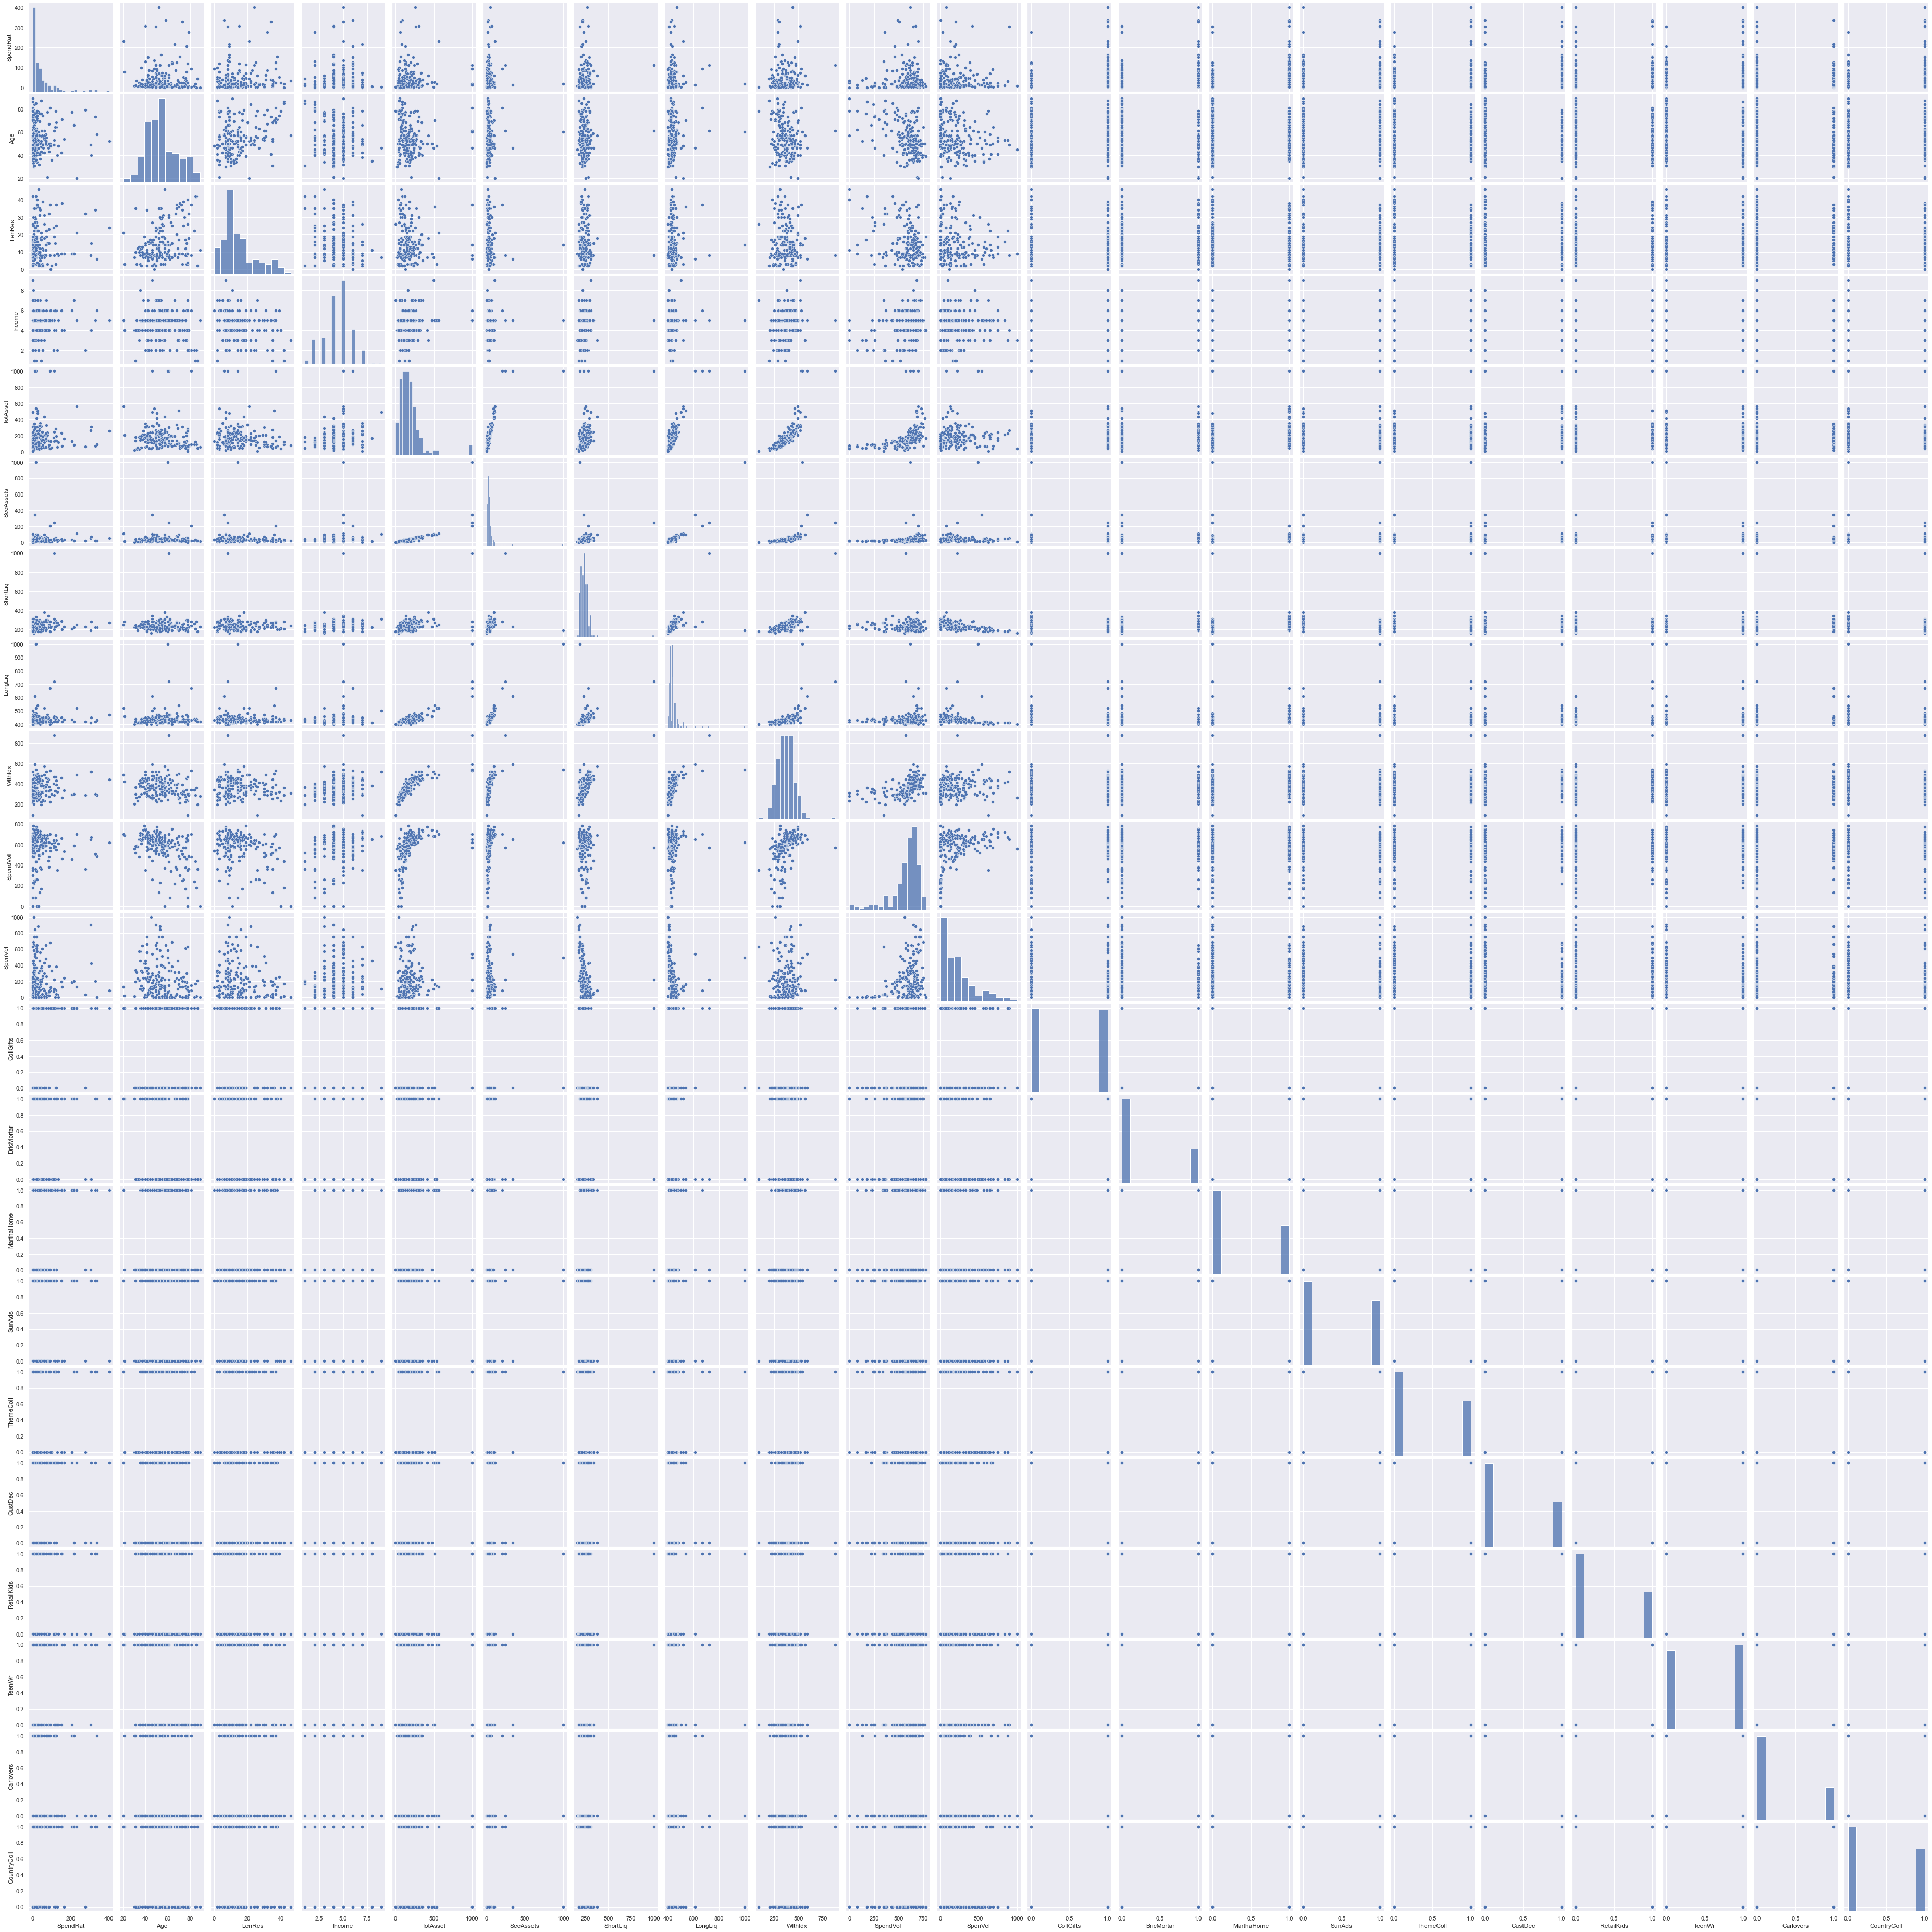

In [10]:
sns.pairplot(clean_catalog)

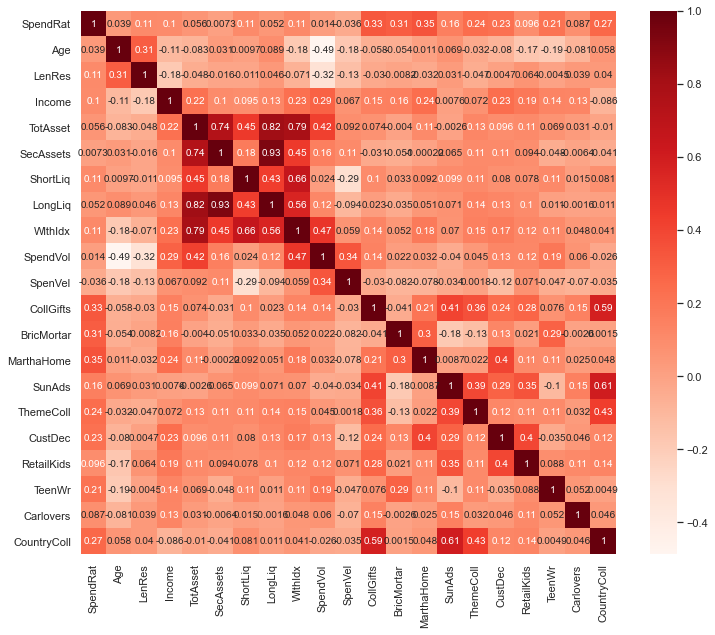

In [11]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = clean_catalog.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

### Modeling   
We are interested in developing a model to predict spending ratio. Find a multiple regression model for predicting the amount of money that consumers will spend on catalog shopping, as measured by spending ratio. Your goal is to identify the best model you can. In your write-up be sure to justify your choice of model, discuss any transformation you make to the variables, discuss your model fit, and discuss the effect of the significant predictors using both hypothesis tests and confidence intervals. Remember to check the conditions for inference as you evaluate your models. The data set is much too small to split into training and test data sets, so use cross validation in all your models.

#### a. Fit a linear model using least squares on the training set, and report the CV error obtained. 

In [12]:
X=clean_catalog.iloc[:,1:21]
y=clean_catalog.iloc[:,0]

# Create linear regression object
regr = lm.LinearRegression()
scores_regr = cross_val_score(regr, X, y, cv=5,scoring='neg_root_mean_squared_error')
-scores_regr.mean()

65.70724929587689

#### b. Fit a KNN model on the training set, and report the CV error obtained.

In [13]:
#create new a knn model
knn = KNeighborsRegressor()

#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}

#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn, param_grid, cv=5)

#fit model to data
knn_gscv.fit(X, y)

#check top performing n_neighbors value
knn_gscv.best_params_

#check mean score for the top performing value of n_neighbors
#abs(knn_gscv.best_score_)

scores_knn = cross_val_score(knn_gscv.best_estimator_, X, y, cv=5,scoring='neg_root_mean_squared_error')
-scores_knn.mean()

67.58932564352287

#### c. Fit a Decision Tree model on the training set, and report the CV error obtained.

In [14]:
#create new a tree model
tree = DecisionTreeRegressor()

#create a dictionary of all values we want to test for max_depth
param_grid = {'max_depth': np.arange(1, 50)}

#use gridsearch to test all values for max_depth
tree_gscv = GridSearchCV(tree, param_grid, cv=5)

#fit model to data
tree_gscv.fit(X, y)

#check top performing max_depth value
tree_gscv.best_params_

#check mean score for the top performing value of max_depth
scores_tree = cross_val_score(tree_gscv.best_estimator_, X, y, cv=5,scoring='neg_root_mean_squared_error')
-scores_tree.mean()

65.76476550068301

#### d. Fit a Random Forest model on the training set, and report the CV error obtained.

In [15]:
#Mow many features to consider?
np.sqrt(clean_catalog.shape[1]-1)

4.47213595499958

In [16]:
max_features = 4
tree_count   = 100

rando_for = RandomForestRegressor(max_features=max_features,random_state=0, n_estimators=tree_count)
scores_rf = cross_val_score(rando_for, X, y, cv=5,scoring='neg_root_mean_squared_error')
-scores_rf.mean()

60.127349834767486

#### e. Fit a Gradient Boosted Regression model on the training set, and report the CV error obtained.

In [17]:
# Gradient boosting

max_features  = 4
learning_rate = 0.1
tree_count    = 100
max_depth = 4

gbm   = GradientBoostingRegressor(max_features=max_features, 
                                   random_state=1, 
                                   n_estimators=tree_count,
                                   learning_rate=learning_rate,
                                   max_depth = 4)
scores_gbm = cross_val_score(gbm, X, y, cv=5,scoring='neg_root_mean_squared_error')
-scores_gbm.mean()

62.57677815489367

#### f. Fit a Regression model we didn't discuss in class. Find an appropriate model, research it, and fit the model, and report the CV error obtained.

How about [MARS](https://machinelearningmastery.com/multivariate-adaptive-regression-splines-mars-in-python/)

In [18]:
# define the model
earth_mod = Earth()

#create a dictionary of all values we want to test for max_degree
param_grid = {'max_degree': np.arange(1, 10)}

#use gridsearch to test all values for max_degree
earth_gscv = GridSearchCV(earth_mod, param_grid, cv=5)

#fit model to data
earth_gscv.fit(X, y)

#check top performing max_depth value
earth_gscv.best_params_

{'max_degree': 1}

In [19]:
#check mean score for the top performing value of max_depth
scores_earth = cross_val_score(earth_gscv.best_estimator_, X, y, cv=5,scoring='neg_root_mean_squared_error')
-scores_earth.mean()

63.31387940189643

#### g. Comment on the results obtained. How accurately can we predict the catalog spending? Is there much difference among the CV errors resulting from these five approaches? 

<AxesSubplot:xlabel='RMSE', ylabel='Regressor'>

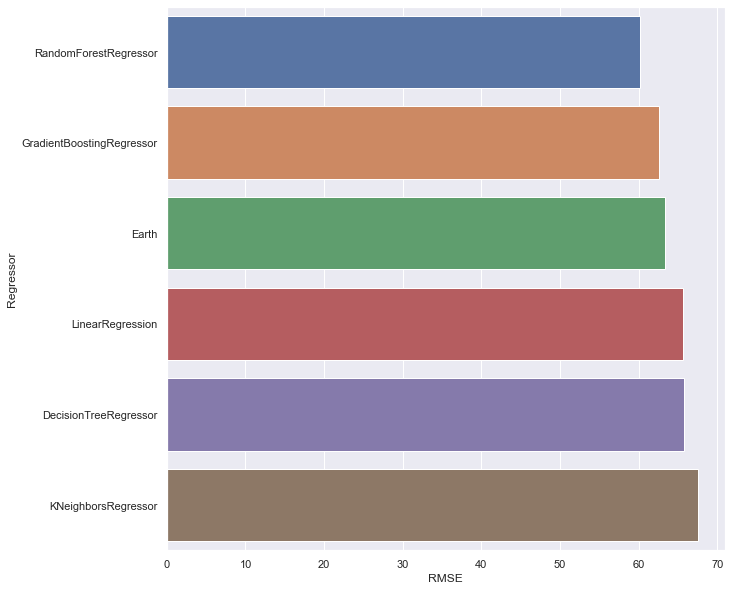

In [20]:
scores=[['LinearRegression', -scores_regr.mean()],
        ['KNeighborsRegressor', -scores_knn.mean()],
        ['DecisionTreeRegressor', -scores_tree.mean()],
        ['RandomForestRegressor', -scores_rf.mean()],
        ['GradientBoostingRegressor', -scores_gbm.mean()],
        ['Earth',-scores_earth.mean()]]

plot_df=pd.DataFrame(scores,columns=['Regressor','RMSE'])
plt.figure(figsize=(10,10))
sns.barplot(x='RMSE',y='Regressor', data=plot_df, order=plot_df.sort_values('RMSE').Regressor)

# All Classifiers . . .

In this problem, you will develop a model to predict whether income exceeds $50K/yr based on [census data](https://archive.ics.uci.edu/ml/datasets/Adult).

#### a. Create the adult data set.

In [21]:
features = ["age", "workclass", "fnlwgt", "education", "edu_num", "marital_status",
        "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss",
        "hrs_per_week", "country", "target"] 

# Change these to local file if available
train_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
test_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test'

# This will download 3.8M
adult_train = pd.read_csv(train_url, names=features, sep=r'\s*,\s*', engine='python', na_values="?")
# This will download 1.9M
adult_test = pd.read_csv(test_url, names=features, sep=r'\s*,\s*', engine='python', na_values="?", skiprows=1)

adult = pd.concat([adult_train,adult_test])
adult.head()

,age,workclass,fnlwgt,education,edu_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hrs_per_week,country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [22]:
# Check for missing values
adult.isna().any()

age               False
workclass          True
fnlwgt            False
education         False
edu_num           False
marital_status    False
occupation         True
relationship      False
race              False
sex               False
capital_gain      False
capital_loss      False
hrs_per_week      False
country            True
target            False
dtype: bool

In [23]:
adult.describe()

,age,fnlwgt,edu_num,capital_gain,capital_loss,hrs_per_week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [24]:
adult['target'].value_counts()

<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: target, dtype: int64

In [25]:
adult['target'] = adult['target'].replace(['>50K.'],'>50K')
adult['target'] = adult['target'].replace(['<=50K.'],'<=50K')

In [26]:
adult['target'].value_counts()

<=50K    37155
>50K     11687
Name: target, dtype: int64

#### b. Explore the data graphically in order to investigate the association between income and the other features. Which of the other features seem most likely to be useful in predicting income? Scatterplots and boxplots may be useful tools to answer this question. Describe your findings.

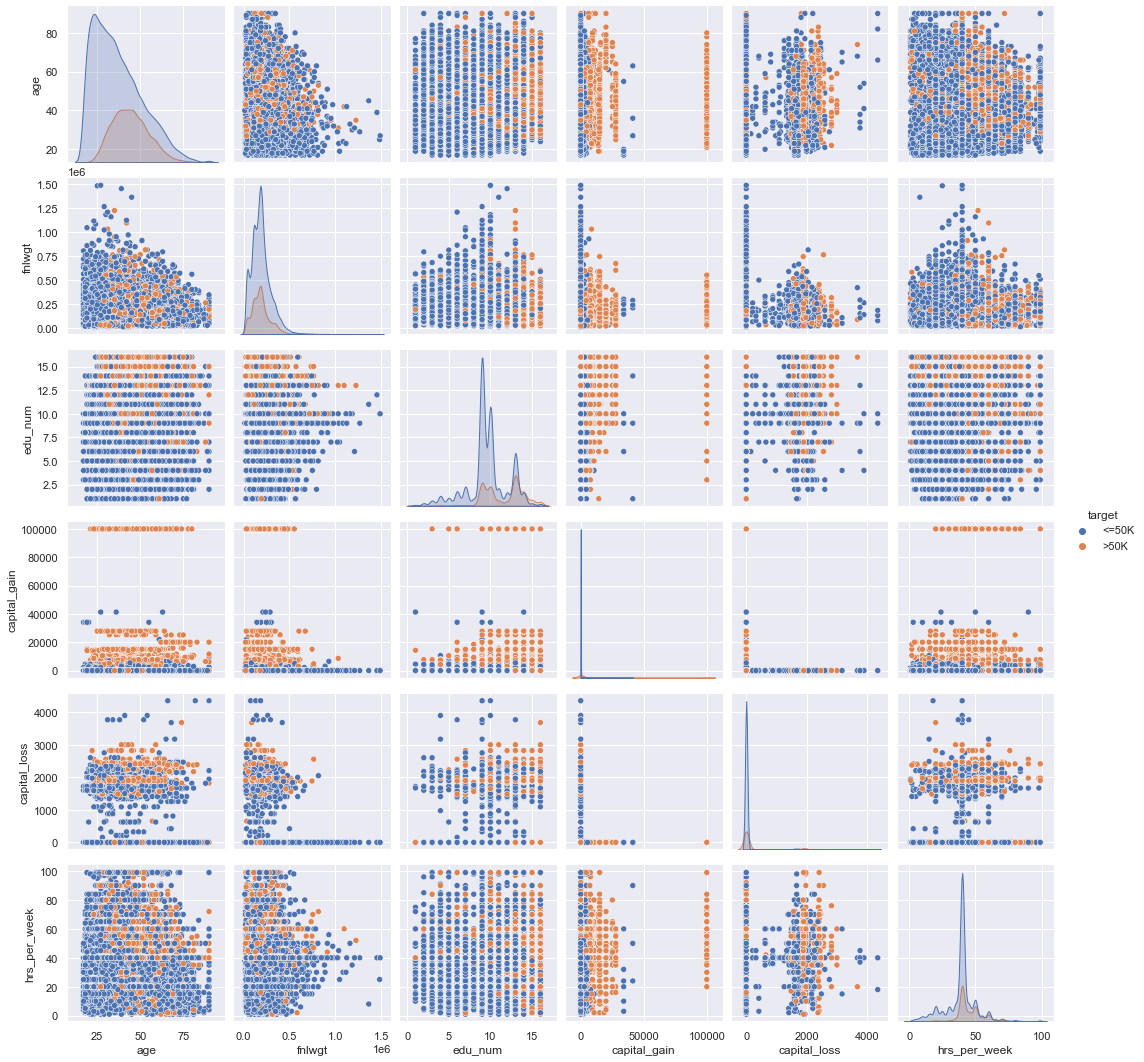

In [27]:
sns.pairplot(adult,vars=['age','fnlwgt','edu_num','capital_gain','capital_loss','hrs_per_week'], hue = "target")

#### c. Split the data into an 80% training set and a 20% test set. Set the seed at 1303.

In [28]:
# Use all features excpet response features
f = 'target ~ 1 + ' + ' + '.join(adult.columns.drop(['target', 'edu_num','fnlwgt']))
y, X = pt.dmatrices(f, adult)
y = y[:,1]

# Create index for training set
np.random.seed(1)
train = np.random.random(len(y)) > 0.2

#### d. Perform LDA on the training data in order to predict income using the variables that seemed most associated with income in (b). What is the test error of the model obtained?

In [29]:
# Fit the LDA model using the training set
lda_clf = LinearDiscriminantAnalysis()
lda_clf.fit(X[~train], y[~train])

LinearDiscriminantAnalysis()

In [30]:
lda_pred = lda_clf.predict(X[~train])
pd.DataFrame(confusion_matrix(y[~train], lda_pred), 
             columns = ["<=50K", ">50K"], index = ["<=50K", ">50K"])

,<=50K,>50K
<=50K,6303,518
>50K,948,1357


In [31]:
lda_clf.score(X[~train], y[~train])

0.8393600701293009

#### e. Perform QDA on the training data in order to predict income using the variables that seemed most associated with income in (b). What is the test error of the model obtained?

In [32]:
# Fit the QDA model using the training set
qda_clf = QuadraticDiscriminantAnalysis()
qda_clf.fit(X[train], y[train])

QuadraticDiscriminantAnalysis()

In [33]:
qda_pred = qda_clf.predict(X[~train])
pd.DataFrame(confusion_matrix(y[~train], qda_pred), 
             columns = ["<=50K", ">50K"], index = ["<=50K", ">50K"])

,<=50K,>50K
<=50K,4494,2327
>50K,454,1851


In [34]:
qda_clf.score(X[~train], y[~train])

0.6952662721893491

#### f. Perform logistic regression on the training data in order to predict income using the variables that seemed most ssociated with income in (b). What is the test error of the model obtained?

In [35]:
# By default scikit-learn uses an l2 regularization penalty, which we don't want for
# vanilla logistic regression as described in the book
log_reg = LogisticRegression(penalty = "none", solver = "lbfgs")
log_reg.fit(X[train], y[train])

log_reg_pred = log_reg.predict(X[~train])
pd.DataFrame(confusion_matrix(y[~train], log_reg_pred), 
             columns = ["<=50K", ">50K"], index = ["<=50K", ">50K"])

,<=50K,>50K
<=50K,6323,498
>50K,966,1339


In [36]:
log_reg.score(X[~train], y[~train])

0.8395792241946088

#### g. Perform KNN on the training data, with several values of K, in order to predict income. Use only the variables that seemed most associated with income in (b). What test errors do you obtain? Which value of K seems to perform the best on this data set?

In [37]:
#create new a knn model
knn = KNeighborsClassifier()

#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}

#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn, param_grid, cv=5)

#fit model to data
knn_gscv.fit(X[train], y[train])

#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 18}

In [38]:
knn_gscv.best_estimator_
knn_pred = knn_gscv.best_estimator_.predict(X[~train])
pd.DataFrame(confusion_matrix(y[~train], knn_pred), 
             columns = ["<=50K", ">50K"], index = ["<=50K", ">50K"])
knn_gscv.best_estimator_.score(X[~train], y[~train])

0.8460442691211922

#### h. Fit a Decision Tree model on the training set, and report the test error obtained.

In [41]:
tree_clf = tree.DecisionTreeClassifier(random_state=0).fit(X[train], y[train])
tree_clf.score(X[~train], y[~train])

0.8136094674556213

#### i. Fit a Random Forest model on the training set, and report the test error obtained.

In [42]:
#Mow many features to consider?
np.sqrt(X[train].shape[1]-1)

9.746794344808963

In [43]:
max_features = 9
tree_count   = 100

rf_clf = RandomForestClassifier(max_features=max_features,random_state=0, n_estimators=tree_count).fit(X[train],y[train])
rf_clf.score(X[~train], y[~train])

0.844291036598729

#### j. Fit a Gradient Boosted Classifier model on the training set, and report the test error obtained.

In [44]:
max_features  = 4
learning_rate = 0.1
tree_count    = 100
max_depth = 4

gbm   = GradientBoostingClassifier(max_features=max_features, 
                                   random_state=1, 
                                   n_estimators=tree_count,
                                   learning_rate=learning_rate,
                                   max_depth = 4)
gbm.fit(X[train], y[train])

gbm.score(X[~train], y[~train])

0.8509752355906202

#### k. Fit a Classification model we didn't discuss in class. Find an appropriate model, research it, and fit the model, and report the test error obtained.

In [45]:
#How about Naive Bayes
gnb = GaussianNB()
y_pred = gnb.fit(X[train], y[train])
gnb.score(X[~train], y[~train])

0.8184308568923954

#### l. Choose which model predicts income the best and justify your choice.

<AxesSubplot:xlabel='Accuracy', ylabel='Classifier'>

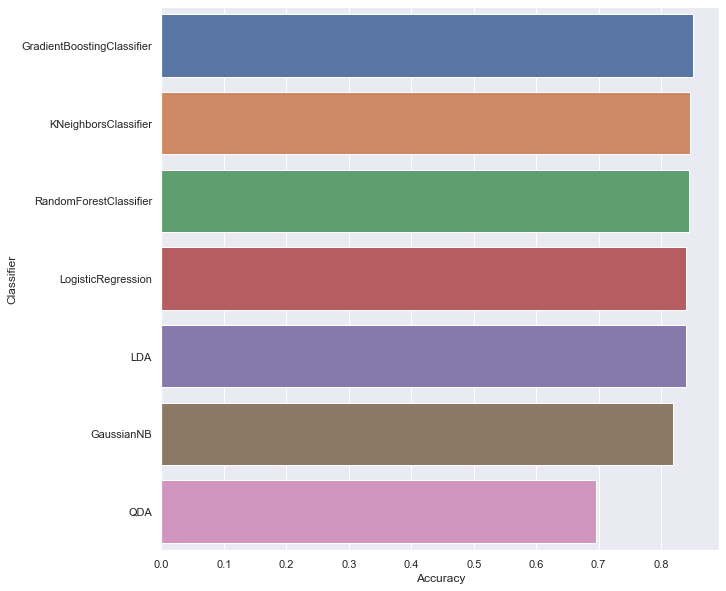

In [46]:
scores=[['LogisticRegression', log_reg.score(X[~train], y[~train])],
        ['KNeighborsClassifier', knn_gscv.best_estimator_.score(X[~train], y[~train])],
        ['LDA', lda_clf.score(X[~train], y[~train])],
        ['QDA', qda_clf.score(X[~train], y[~train])],
        ['RandomForestClassifier', rf_clf.score(X[~train], y[~train])],
        ['GradientBoostingClassifier', gbm.score(X[~train], y[~train])],
        ['GaussianNB',gnb.score(X[~train], y[~train])]]

plot_df=pd.DataFrame(scores,columns=['Classifier','Accuracy'])
plt.figure(figsize=(10,10))
sns.barplot(x='Accuracy',y='Classifier', data=plot_df, order=plot_df.sort_values('Accuracy',ascending=False).Classifier)